In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.131.jpg  
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_do

In [ ]:
import os
import shutil

# Make subfolder if it doesn't exist
test_images_path = os.path.join(test_dir, 'unknown')
os.makedirs(test_images_path, exist_ok=True)

# Move all images into 'unknown' folder
for fname in os.listdir(test_dir):
    src = os.path.join(test_dir, fname)
    dst = os.path.join(test_images_path, fname)
    if os.path.isfile(src):
        shutil.move(src, dst)


In [ ]:
# 3
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True
)


validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


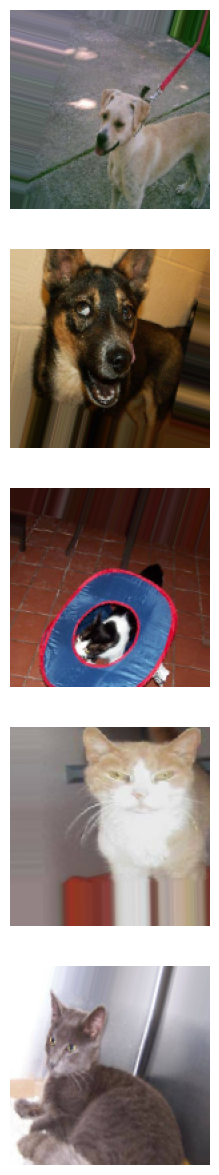

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True
)


Found 2000 images belonging to 2 classes.


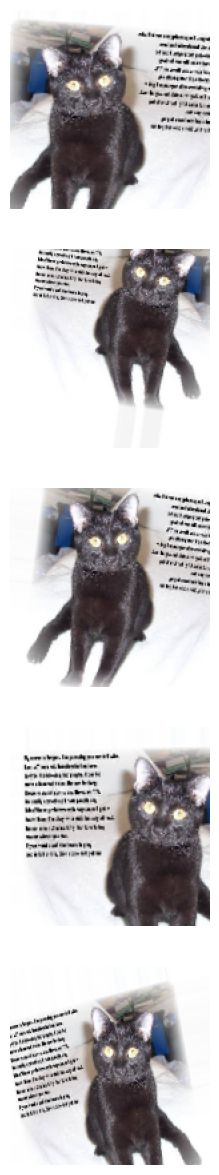

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
from keras.applications.vgg16 import VGG16


conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3)
)

In [ ]:
# 7
# 7

model = Sequential()

model.add(conv_base)
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

conv_base.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,853,313 (64.29 MB)

 Trainable params: 2,138,625 (8.16 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# 8
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen
)

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5389 - loss: 0.7166 - val_accuracy: 0.8190 - val_loss: 0.4193
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7715 - loss: 0.4794 - val_accuracy: 0.8400 - val_loss: 0.3388
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8149 - loss: 0.3945 - val_accuracy: 0.8790 - val_loss: 0.2961
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8553 - loss: 0.3430 - val_accuracy: 0.8700 - val_loss: 0.2951
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8446 - loss: 0.3463 - val_accuracy: 0.8810 - val_loss: 0.2754
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8769 - loss: 0.2987 - val_accuracy: 0.8880 - val_loss: 0.2553
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8762 - loss: 0.3031 - val_accuracy: 0.8900 - val_loss: 0.2599
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8741 - loss: 0.2935 - val_accuracy: 0.8930 - val_loss:

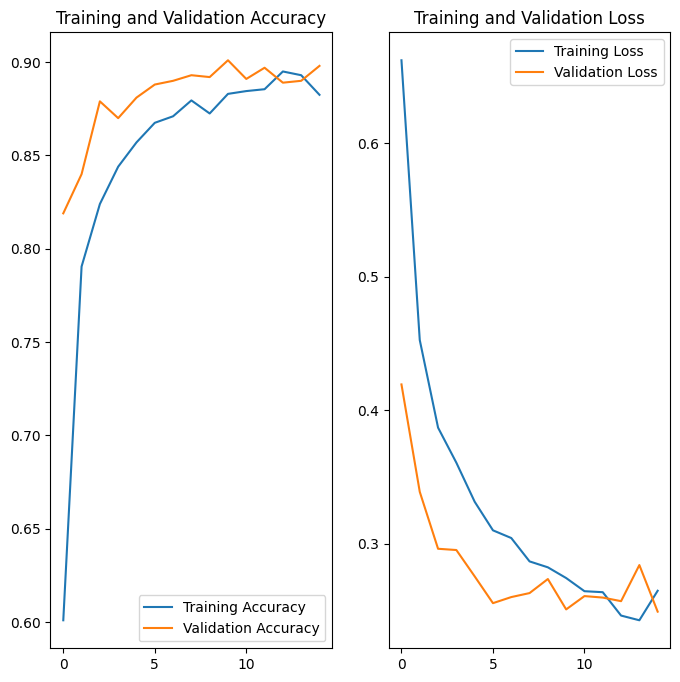

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
probabilities = model.predict(test_data_gen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


In [ ]:
probabilities = probabilities.flatten()

In [ ]:
probabilities

array([9.7987515e-01, 1.8237729e-01, 1.8475865e-04, 9.0431374e-01,
       1.6338675e-03, 8.2234479e-02, 1.2427804e-02, 1.1371819e-03,
       9.9113315e-01, 1.0000000e+00, 3.0951386e-03, 1.0000000e+00,
       3.1943887e-02, 9.9997199e-01, 2.5017002e-01, 9.9986351e-01,
       6.8710423e-01, 5.8018442e-02, 9.0226996e-01, 9.9981409e-01,
       9.0131806e-03, 9.2369741e-01, 1.0000000e+00, 7.9168814e-01,
       9.9994743e-01, 1.2545218e-01, 9.9542218e-01, 5.7490305e-03,
       8.8913336e-02, 1.4304748e-04, 1.0792477e-04, 8.0203358e-03,
       7.5357902e-01, 9.9954540e-01, 2.3055162e-02, 9.9633837e-01,
       9.9999917e-01, 9.9997818e-01, 9.5681888e-01, 3.1258289e-02,
       1.2147735e-01, 9.5978711e-04, 9.5901054e-01, 9.9282795e-01,
       1.4613945e-03, 9.6111950e-03, 6.7402802e-02, 6.9176881e-06,
       2.7868893e-02, 3.9865524e-03], dtype=float32)

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 94.0% of the images of cats and dogs.
You passed the challenge!
